### Símbolos das equações

$P_{CP}$ - Pontos obtidos á carga paga carregada
\
$PV_{previsto}$ - Previsão de peso vázio
\
$PV_{real}$ - Previsão de peso vázio
\
$CP$ - Carg paga total [em kg]
\
$FPV$ - Fator de previsão de peso vazio
\
$FPR$ - Fator de pontuação de relatório
\
$NR$ - Nota total de relatório da equipe
\
$NR_{máx}$ - Nota máxima de relatório
\
$P_{Voo}$ - Pontuação de voo
\
$P_{AC}$ - Acuracidade de carga paga 
\
$CP_{Prevista}$ - Carga paga prevista [gráfico de carga paga]
\
$CP_{Real}$ - Carga paga real [obtida em voo]
\
$B_{PO}$ - Pontos obtidos como bonificação de parada de pista
\
$B_{RC}$ - Bonitificação pelo tempo de retirada de carga
\
$P_{B1}$ e $P_{B2}$ - Pontuação total de cada bateria 1 e 2 

In [1]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Alpha_MDO import *

In [2]:
lot = loteria(50e6)
df = lot.gen_dados()

100%|██████████| 50000000/50000000 [1:01:24<00:00, 13572.02it/s]


In [7]:
df.to_csv('espaco_amostral.txt')

In [4]:
df.sample(5) #head, tail

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
33854514,3.917339,1.336426,13.965643,14.642403,59.157300,185.0,25.558569,403.222792
2028443,3.285923,2.157578,19.742793,15.397576,122.194524,185.0,78.977938,398.282022
49013052,2.640596,1.577803,10.166331,19.561624,59.279309,185.0,26.250854,492.747889
7646807,3.391384,1.591127,19.159692,14.573949,88.141837,185.0,68.778301,364.287793
46762167,3.629012,3.389467,15.828990,16.354955,61.065657,185.0,46.101331,486.832309


In [21]:
df.describe()

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
count,5.000000e+07,5.000000e+07,5.000000e+07,5.000000e+07,5.000000e+07,50000000.0,5.000000e+07,5.000000e+07
mean,2.500119e+00,2.499826e+00,1.250033e+01,1.250046e+01,9.249390e+01,185.0,5.999789e+01,3.438834e+02
std,8.660293e-01,8.660472e-01,4.329886e+00,4.329791e+00,5.340413e+01,0.0,3.464079e+01,1.127240e+02
min,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.632579e-06,185.0,6.254372e-06,1.393000e+02
25%,1.750138e+00,1.749794e+00,8.751041e+00,8.751490e+00,4.624816e+01,185.0,2.999363e+01,2.478338e+02
50%,2.500165e+00,2.499757e+00,1.250037e+01,1.250010e+01,9.249140e+01,185.0,6.000014e+01,3.425542e+02
75%,3.250191e+00,3.249784e+00,1.624880e+01,1.624926e+01,1.387434e+02,185.0,8.999940e+01,4.372323e+02
max,4.000000e+00,4.000000e+00,2.000000e+01,2.000000e+01,1.850000e+02,185.0,1.200000e+02,7.201805e+02


#### Indice que corresponde o maior valor para cada parâmetro

In [8]:
#Encontrando os indices de maior valor
df.idxmax()

PV_prev       26223857
PV_real       40367849
CP_prev       49046202
CP_real        1125277
NR            22990627
NR_max               0
tempo          3494759
resultados    22577581
dtype: int64

#### Pontuações de cada parâmetro que obteve maior resultado

In [9]:
df.iloc[df.idxmax()['resultados']]

PV_prev         2.633475
PV_real         2.685324
CP_prev        19.537955
CP_real        19.921099
NR            184.016701
NR_max        185.000000
tempo           1.624745
resultados    720.180477
Name: 22577581, dtype: float64

#### Filtrando os dados para otimizar os resultados

In [22]:
filtro_df = df[((df['CP_real'] <= 8) & (df['tempo'] >= 40) & (df['NR'] <= 120))] # &=and e |=or
filtro_df 

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
12,2.580952,1.699699,5.309648,6.670303,118.758417,185.0,68.785049,183.815605
19,1.715036,2.058247,19.819440,5.087404,6.738626,185.0,98.828978,141.353993
27,2.265598,3.715871,5.554708,6.447065,100.661703,185.0,70.771823,173.306016
31,1.653169,1.550125,15.643150,6.367543,59.196503,185.0,44.556481,196.066550
39,3.363092,3.181067,19.092958,7.192178,23.982924,185.0,116.458079,214.092501
...,...,...,...,...,...,...,...,...
49999944,3.656109,2.388747,9.896831,7.799514,66.580291,185.0,81.944561,205.088587
49999949,1.274126,2.098132,13.497534,5.158019,115.698875,185.0,44.152494,151.601117
49999958,1.419068,2.298309,5.264887,6.233052,112.776806,185.0,97.817806,171.357370
49999979,3.908291,1.373075,8.110589,7.960054,65.083137,185.0,110.936070,238.086612


In [23]:
filtro_df[filtro_df['resultados'] == max(filtro_df['resultados'])]

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
21106138,1.939904,1.934091,7.980834,7.956097,115.106122,185.0,45.434547,280.331766


In [31]:
filtro_df = df[((df['CP_real'] <= 10) & 
                (df['tempo'] >= 30) & 
                (df['NR'] <= 130) & 
                (df['resultados'] > 332))] # &=and e |=or
filtro_df 

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
60961,2.666006,2.607996,9.983352,9.840668,129.811811,185.0,87.173176,336.699260
132231,2.419704,2.497704,10.055470,9.773970,125.831899,185.0,50.679220,333.008788
245946,3.729019,3.882751,9.533228,9.791263,126.145086,185.0,32.474234,338.505902
468122,3.732900,3.769028,9.428750,9.810877,128.295876,185.0,85.305020,333.083732
1264552,2.535793,2.476426,9.438837,9.953348,128.999382,185.0,38.736574,341.736806
...,...,...,...,...,...,...,...,...
48618209,2.127267,2.122762,9.385731,9.471546,127.240310,185.0,35.301676,333.816756
48677120,1.111799,1.096287,10.499417,9.917975,126.889608,185.0,52.887382,335.195007
49775496,2.804651,2.877453,9.868591,9.817242,127.816065,185.0,68.679034,334.699024
49826674,3.825521,3.942152,9.592490,9.692471,125.786929,185.0,44.517932,334.235967


#### Encontrando o melhor valor pra 'resultados' dentro os dados filtrados

In [32]:
filtro_df[filtro_df['resultados'] == max(filtro_df['resultados'])]

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
45416185,1.347453,1.325434,10.264977,9.996786,124.49134,185.0,33.295454,346.072912


#### Verificando burri-convergencia do algoritmo

In [31]:
def burrice(max_it=10000):
    lot = loteria(max_it)
    df2 = lot.gen_dados(False)
    return df2.iloc[df.idxmax()['resultados']]['resultados'] 

max_it = 100
burros_resultados = np.empty((max_it))
for i in tqdm(range(max_it)): 
    burros_resultados[i] = (burrice(max_it))

#burros_resultados

100%|██████████| 100/100 [00:01<00:00, 93.13it/s]


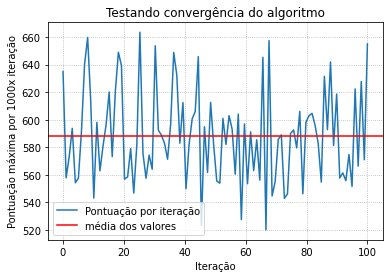

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(0, max_it, max_it)

fig, ax = plt.subplots()
ax.set(title='Testando convergência do algoritmo', xlabel='Iteração', ylabel='Pontuação máxima por 1000x iteração')
ax.plot(x, burros_resultados, label='Pontuação por iteração')
ax.axhline(sum(burros_resultados)/max_it, label = 'média dos valores', color = 'r')
ax.legend()
#ax.set_ylim(300, 170)
ax.grid(linestyle = 'dotted')

Até que "converge" pra um valor legal 

In [33]:
fig.savefig('D:/conv.pdf')